### Required libraries

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as sw
import nltk
from bs4 import BeautifulSoup

from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import string


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/AI_dataset/'

### 1. Importing dataset from kaggle

In [57]:
!kaggle datasets download Cornell-University/arxiv

arxiv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
!unzip '/content/arxiv.zip'

Archive:  /content/arxiv.zip
replace arxiv-metadata-oai-snapshot.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [59]:
DATASET_PATH = "/content/arxiv-metadata-oai-snapshot.json"

# The number of papers on which the models will be trained and that also will be analyzed.
# There are over 2 million papers in this dataset, I'll select a subset.
NUM_PAPERS = 100000

#### selecting 2 lakh rows for analysis

In [60]:
def get_dataset_generator(path: str):
    with open(path, "r") as fp:
        for line in fp:
            row = json.loads(line)
            yield row


dataset_generator = get_dataset_generator(
    path=DATASET_PATH
)
print(type(dataset_generator))

<class 'generator'>


In [65]:
import pandas as pd

def extract_abstract_and_year(generator):
    titles = []
    abstracts = []
    years = []

    for row in generator:
        if len(abstracts) == NUM_PAPERS:
            break

        titles.append(row["title"])
        abstracts.append(row["abstract"])
        # Extract the year from the "update_date" and append it
        years.append(pd.to_datetime(row["update_date"]).year)

    return pd.DataFrame({"title": titles, "abstract": abstracts, "year": years})


In [66]:
df = extract_abstract_and_year(dataset_generator)

In [67]:
df

,title,abstract,year
0,Supernovae Powered by Collapsar Accretion in G...,The association of long-duration gamma-ray b...,2015
1,Itinerant-Electron Magnetism in the Heisenberg...,The Hubbard model in the Heisenberg limit is...,2010
2,Convergent finite difference solvers for visco...,The elliptic Monge-Amp\`ere equation is a fu...,2011
3,Non-equilibrium steady state of sparse systems,A resistor-network picture of transitions is...,2011
4,Retransmission Steganography Applied,This paper presents experimental results of ...,2010
...,...,...,...
199995,Thermal spin fluctuations in spinor Bose-Einst...,We study the thermal activation of spin fluc...,2013
199996,"Commuting Local Hamiltonians on Expanders, Loc...",Understanding commuting local Hamiltonians (...,2013
199997,Dirichlet-Neumann inverse spectral problem for...,We solve two inverse spectral problems for s...,2016
199998,Finite groups and Lie rings with a metacyclic ...,Suppose that a finite group $G$ admits a Fro...,2013


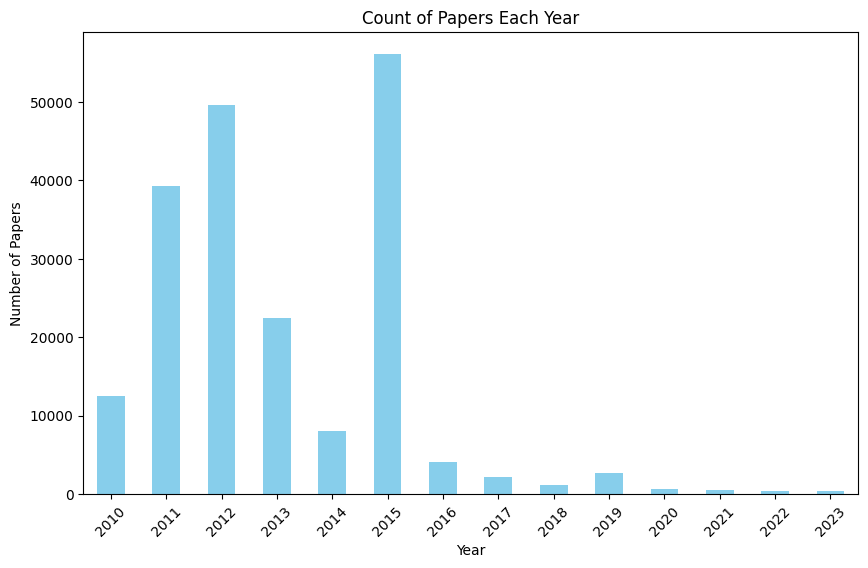

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by year and count the number of papers for each year
yearly_counts = df['year'].value_counts().sort_index()

# Plot the count of papers each year
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Papers Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [69]:
print("Missing values by column:")
df.isnull().sum()

Missing values by column:


title       0
abstract    0
year        0
dtype: int64

In [70]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [71]:


# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming (you can also use lemmatization)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

df['newabstract'] = df['abstract'].apply(preprocess_text)

# Now, your "Title" and "Abstract" columns in the DataFrame have been preprocessed.

In [72]:
df

,title,abstract,year,newabstract
0,Supernovae Powered by Collapsar Accretion in G...,The association of long-duration gamma-ray b...,2015,associ long durat gamma ray burst lgrb type ic...
1,Itinerant-Electron Magnetism in the Heisenberg...,The Hubbard model in the Heisenberg limit is...,2010,hubbard model heisenberg limit studi kondo lat...
2,Convergent finite difference solvers for visco...,The elliptic Monge-Amp\`ere equation is a fu...,2011,ellipt mong amp ere equat fulli nonlinear part...
3,Non-equilibrium steady state of sparse systems,A resistor-network picture of transitions is...,2011,resistor network pictur transit appropri studi...
4,Retransmission Steganography Applied,This paper presents experimental results of ...,2010,paper present experiment result implement netw...
...,...,...,...,...
199995,Thermal spin fluctuations in spinor Bose-Einst...,We study the thermal activation of spin fluc...,2013,studi thermal activ spin fluctuat dynam stabl ...
199996,"Commuting Local Hamiltonians on Expanders, Loc...",Understanding commuting local Hamiltonians (...,2013,understand commut local hamiltonian clh heart ...
199997,Dirichlet-Neumann inverse spectral problem for...,We solve two inverse spectral problems for s...,2016,solv two invers spectral problem star graph st...
199998,Finite groups and Lie rings with a metacyclic ...,Suppose that a finite group $G$ admits a Fro...,2013,suppos finit group g admit frobeniu group auto...


In [73]:
df.to_csv("cleaned_data.csv")

In [74]:
df['abstract'][0]

"  The association of long-duration gamma-ray bursts (LGRBs) with Type Ic\nsupernovae presents a challenge to supernova explosion models. In the collapsar\nmodel for LGRBs, gamma rays are produced in an ultrarelativistic jet launching\nfrom the magnetosphere of the black hole that forms in the aftermath of the\ncollapse of a rotating progenitor star. The jet is collimated along the star's\nrotation axis, but the concomitant luminous supernova should be\nrelatively--though certainly not entirely--spherical, and should synthesize a\nsubstantial mass of 56Ni. Our goal is to provide a qualitative assessment of\nthe possibility that accretion of the progenitor envelope onto the black hole,\nwhich powers the LGRB, could also deposit sufficient energy and nickel mass in\nthe envelope to produce a luminous supernova. For this, the energy dissipated\nnear the black hole during accretion must be transported outward, where it can\ndrive a supernova-like shockwave. Here we suggest that the energy 

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform the Abstract column
tfidf_abstract = tfidf_vectorizer.fit_transform(df['newabstract'])


In [78]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def check_similarity(new_idea, dataset_df, threshold=0.35, top_n=5):
    # Transform the dataset abstracts
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_abstract = tfidf_vectorizer.fit_transform(dataset_df['newabstract'])

    # Transform the new idea
    tfidf_new_idea = tfidf_vectorizer.transform([new_idea])

    # Calculate cosine similarity between the new idea and all abstracts
    cosine_similarities = cosine_similarity(tfidf_new_idea, tfidf_abstract)

    # Check if the new idea's similarity to any paper is greater than the threshold
    is_idea_already_present = any(similarity > threshold for similarity in cosine_similarities[0])

    # Find the top N similar papers
    top_indices = cosine_similarities.argsort()[0][::-1][:top_n]
    top_scores = [cosine_similarities[0][i] for i in top_indices]

    return is_idea_already_present, top_indices, top_scores

# Usage example:
new_idea = """This article is about the use of Myth in Tamil literature. The stories and philosophical sayings of the inevitable god are termed as “MYTH". The antiquity of language is based on the diversity of myths used in that language. Myth is considered the spirit of the literature. In foreign countries, myth plays a unique and professional role. The author applies the idea of myth to make his work efficient. The beliefs of the end of the world and thoughts beyond the reach of human beings are seen in myths. The roots of myth have been gowned dup from the ancient Tamil literature to revival poetry of the 20th century. Myth is even present in secular literature works as the Sangam literature Heritage period went to its peak. Myth played a diverse role in Tamil literature. Library research was made for this study and an explanatory method was used to write this article. The findings of this article are Culture and Tradition of Race are influencing myth and how the myth was seen in the literature. This study summarizes the uses of myths and ideology in Tamil literature."""
# Assuming you already have the 'df' DataFrame
is_present, top_indices, top_scores = check_similarity(new_idea, df)

if is_present:
    print("The new idea is already present in the dataset.")
else:
    print("The new idea is not present in the dataset.")

if len(top_indices) > 0:
    print("Top 5 Related Papers:")
    for i, (index, score) in enumerate(zip(top_indices, top_scores), start=1):
        title = df.loc[index]['title']  # Replace 'title' with your actual title column name
        print(f"{i}. Paper Title: {title}, \nIndex: {index}, \nCosine Similarity Score: {score}")
        print()
else:
    print("No related papers found.")




The new idea is not present in the dataset.
Top 5 Related Papers:
1. Paper Title: Star-covering properties: generalized $\Psi$-spaces, countability
  conditions, reflection, 
Index: 52983, 
Cosine Similarity Score: 0.34223862356603985

2. Paper Title: Notes on the od-Lindel\"of property, 
Index: 146814, 
Cosine Similarity Score: 0.28111203694680953

3. Paper Title: Discovery of the Expansion of the Universe, 
Index: 78746, 
Cosine Similarity Score: 0.19631844203637921

4. Paper Title: Optical pulsations from isolated neutron stars, 
Index: 103770, 
Cosine Similarity Score: 0.1812331152890797

5. Paper Title: A pseudogap term in the magnetic response of the cuprate superconductors, 
Index: 40772, 
Cosine Similarity Score: 0.15045600564691552



####Extract keywords or key phrases from the new idea and compare them with the keywords in the dataset's abstracts. This can be a quick way to identify potential matches.

#### Using BERT Model

In [80]:
!pip install sentence_transformers

In [79]:
new_idea = """This article is about the use of Myth in Tamil literature. The stories and philosophical sayings of the inevitable god are termed as “MYTH". The antiquity of language is based on the diversity of myths used in that language. Myth is considered the spirit of the literature. In foreign countries, myth plays a unique and professional role. The author applies the idea of myth to make his work efficient. The beliefs of the end of the world and thoughts beyond the reach of human beings are seen in myths. The roots of myth have been gowned dup from the ancient Tamil literature to revival poetry of the 20th century. Myth is even present in secular literature works as the Sangam literature Heritage period went to its peak. Myth played a diverse role in Tamil literature. Library research was made for this study and an explanatory method was used to write this article. The findings of this article are Culture and Tradition of Race are influencing myth and how the myth was seen in the literature. This study summarizes the uses of myths and ideology in Tamil literature."""

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util


# Load a pre-trained BERT-based model
model_name = "bert-base-nli-mean-tokens"  # This is a BERT-based model fine-tuned for sentence embeddings
model = SentenceTransformer(model_name)

# Convert abstracts to sentence embeddings
abstract_embeddings = model.encode(df['newabstract'].tolist(), convert_to_tensor=True)

# Encode the new idea
new_idea_embedding = model.encode(new_idea, convert_to_tensor=True)

# Calculate cosine similarities between the new idea and all abstracts
similarities = util.pytorch_cos_sim(new_idea_embedding, abstract_embeddings)


In [ ]:
similarities

In [ ]:
# Move the similarities tensor to CPU
similarities = similarities.cpu()

In [ ]:
similarities

In [ ]:
# a similarity threshold to determine if the idea already exists
similarity_threshold = 0.85

# Check if any paper has a similarity score above the threshold
if any(similarity > similarity_threshold for similarity in similarities[0]):
    print("The new idea is already present in the dataset.")
else:
    print("The new idea is not present in the dataset.")